In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

In [3]:
%cd d:\Documents\DREAM\Portfolio\Data

d:\Documents\DREAM\Portfolio\Data


## Importing Dataset

In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


### Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#Duplicated data
df.duplicated().sum()

0

We can see that there are some missing values in director, cast, country, data_added, rating, and duration

#### Manage Duration Variable's Missing Value

In [8]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


we can know that there is misplaced of value in rating and duration. First, let's fill the duration with the value of rating

In [9]:
df['duration'][5541] = '74 min'
df['duration'][5794] = '84 min'
df['duration'][5813] = '66 min'

In [10]:
df['duration'].isna().sum()

0

#### Manage Rating Variable's Missing Values 

We find some misplaced of rating, so let see the value of rating.

In [11]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [12]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [13]:
#We fill the missing value with mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [14]:
#Replace the misplaced value with mode
df['rating'][5541] = df['rating'].mode()[0]
df['rating'][5794] = df['rating'].mode()[0]
df['rating'][5813] = df['rating'].mode()[0]

In [15]:
df['rating'].isna().sum()

0

#### Manage Date_Added Variable's Missing Value

In [16]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [17]:
#We replace the missing values with Mode
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [18]:
#Change the date added and release year as datetime type
df['date_added'] = pd.to_datetime(df['date_added'], dayfirst=True)

In [19]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [20]:
#Make new columns for day, month and year of date_added
df['day_added'] = pd.DatetimeIndex(df['date_added']).day
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

In [21]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021


#### Manage Country, Cast, and, Director Variable's Missing Value

In [22]:
#We replace the missing values of country with None because it is categorical data and doesn't make sense if we replace it with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)
#Meanwhile, replacing the missing values of cast and director with unknown
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

#### Analyzing Data

##### 1. How content is distributed?

In [23]:
content = pd.DataFrame(df['type'].value_counts().reset_index(name='counts'))
content

,index,counts
0,Movie,6131
1,TV Show,2676


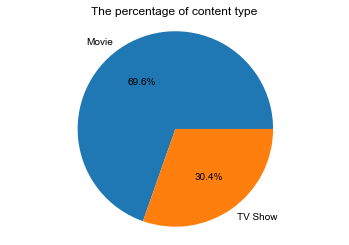

In [24]:
plot = plt.pie(content['counts'], labels=content['index'], autopct='%1.1f%%')
sns.set_theme()
plt.axis('equal')
plt.title('The percentage of content type')
plt.savefig('The percentage of content type')

##### 2. Which countries is the highest number of movie and tv show?

In [25]:
#Movie
movie = df[df['type']=='Movie']['country'].value_counts()
movie = pd.DataFrame(movie.reset_index(name='counts').head(5))
movie

,index,counts
0,United States,2498
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97


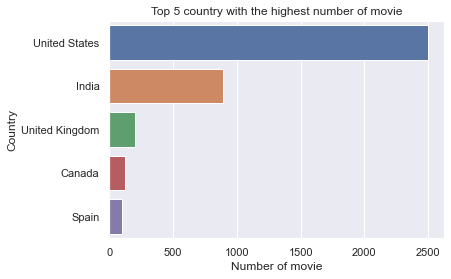

In [26]:
sns.set_theme()
movie_plot = sns.barplot(x='counts', y='index', data=movie, orient='h')
movie_plot.set_title('Top 5 country with the highest number of movie')
movie_plot.set_xlabel('Number of movie')
movie_plot.set_ylabel('Country')
plt.savefig('Top 5 country with the highest number of movie', bbox_inches = 'tight')

In [27]:
#TV Show
tv_show = df[df['type'] == 'TV Show']['country'].value_counts()
tv_show = pd.DataFrame(tv_show.reset_index(name='counts')).head(5)
tv_show

,index,counts
0,United States,1151
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79


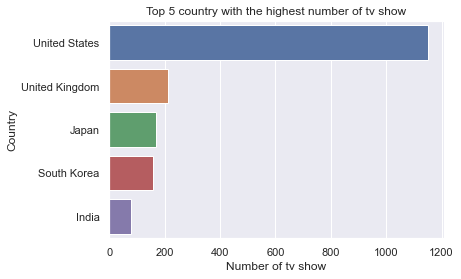

In [28]:
sns.set_theme()
tv_plot = sns.barplot(x = 'counts', y = 'index', data = tv_show)
tv_plot.set_title('Top 5 country with the highest number of tv show')
tv_plot.set_xlabel('Number of tv show')
tv_plot.set_ylabel('Country')
plt.savefig('Top 5 country with the highest number of tv show', bbox_inches = 'tight')

We can conclude that:
- United states is the country with the highest number of both movie and tv show.
- United kingdom and India also being top 5 both type of content.

##### 3. How many content have added over years?

In [29]:
#Get the oldest and newest added date 
old = min(df['date_added'])
new = max(df['date_added'])
print('old date of added content is ' + str(old))
print('new date of added content is ' + str(new))

old date of added content is 2008-01-01 00:00:00
new date of added content is 2021-09-25 00:00:00


From this we can say that it will not be a good choice to compare the number of movie and tv show by the year because in 2021 we only have dataset until September.

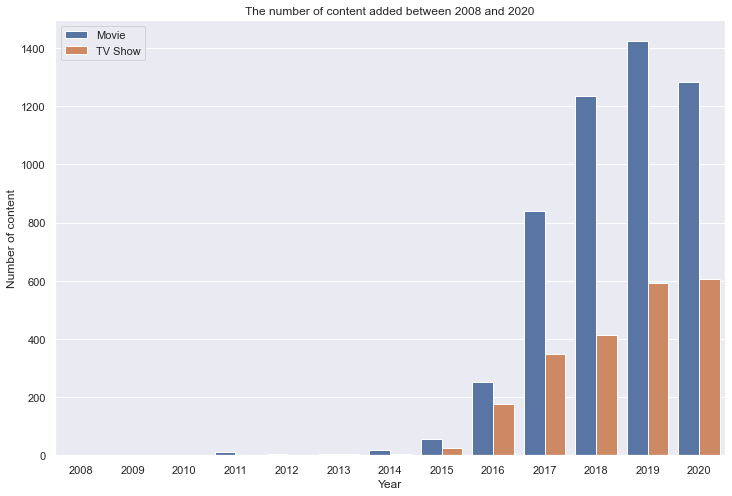

In [30]:
#Lets count the number of movie and tv show between 2008 and 2020
sns.set_theme()
plt.figure(figsize=(12,8))
count = df[df['year_added'] != 2021]
year_plot = sns.countplot(x = 'year_added', data = count, hue='type')
year_plot.set_title('The number of content added between 2008 and 2020')
year_plot.set_xlabel('Year')
year_plot.set_ylabel('Number of content')
plt.legend(loc='upper left')
plt.savefig('The number of content added between 2008 and 2020', bbox_inches = 'tight')

In [31]:
year_2012 = df[df['year_added'] == 2012].shape[0]
year_2013 = df[df['year_added'] == 2013].shape[0]
print('the number of content added in 2012 is ' + str(year_2012))
print('the number of content added in 2013 is ' + str(year_2013))

the number of content added in 2012 is 3
the number of content added in 2013 is 11


We can conclude that:
- not much content added in 2012 and 2013
- the number of tv show added was increased over years start from 2015
- the number of movie added was increased until 2019 but decreased in 2020

Since we can not compare 2021 with others, let's take a look the distribution of content added in 2021.

In [32]:
year_2021 = df[df['year_added'] == 2021]['type'].value_counts()
year_2021 = pd.DataFrame(year_2021.reset_index(name='counts'))
year_2021

,index,counts
0,Movie,993
1,TV Show,505


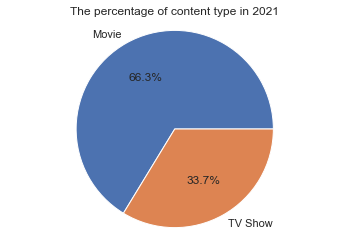

In [33]:
plot = plt.pie(year_2021['counts'], labels=year_2021['index'], autopct='%1.1f%%')
sns.set_theme()
plt.axis('equal')
plt.title('The percentage of content type in 2021')
plt.savefig('The percentage of content type in 2021')

We can say that more than a half of content added in 2021 until September is movie.

#### 4. How the genre of content is distributed?

From the summary of the data , there is a column called listed_in which specifies what is the genre of each of the content.There are multiple genres for a single title. Lets check how is the genre distributed in this dataset.

In [34]:
df['listed_in']=df['listed_in'].astype('str')
df['num_listing']=df['listed_in'].apply(lambda x:len(x.split(",")))

In [35]:
listing=set()
count_listings=Counter()

for listings in df['listed_in']:
    listings=listings.split(",")
    listing.update([lst.strip() for lst in listings])
    for lst in listings:
        count_listings[lst.strip()]+=1

listings_title=pd.DataFrame.from_dict(count_listings,orient='index')
listings_title.sort_values(0,ascending=False,inplace=True)
listings_title.rename(columns={0:'count'},inplace=True)
listings_title[:10]

,count
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


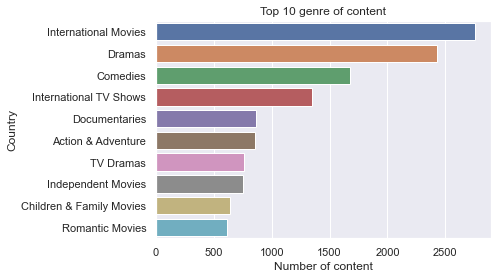

In [36]:
genre = sns.barplot(y=listings_title[:10].index, x='count',data=listings_title[:10], orient='h')
genre.set_title('Top 10 genre of content')
genre.set_xlabel('Number of content')
genre.set_ylabel('Country')
plt.savefig('Top 10 genre of content', bbox_inches = 'tight')

##### 5. Which genres is most added in United States?

We know from preciuos analysis that United States is the top country with both content added. Next, we will find which genre is most added in United States.

In [37]:
df['listed_in_US']=df[df['country']=='United States']['listed_in'].astype('str')
listed_in_us = df['listed_in_US'].dropna()
num_listing = listed_in_us.apply(lambda x:len(x.split(",")))

In [38]:
US=set()
count_listings=Counter()

for list in listed_in_us:
    list=list.split(",")
    US.update([lst.strip() for lst in list])
    for lst in list:
        count_listings[lst.strip()]+=1

US_genre=pd.DataFrame.from_dict(count_listings,orient='index')
US_genre.sort_values(0,ascending=False,inplace=True)
US_genre.rename(columns={0:'count'},inplace=True)
US_genre[:10]

,count
Dramas,701
Comedies,618
Documentaries,486
Children & Family Movies,378
TV Comedies,314
Independent Movies,313
Action & Adventure,291
TV Dramas,289
International TV Shows,250
Stand-Up Comedy,247


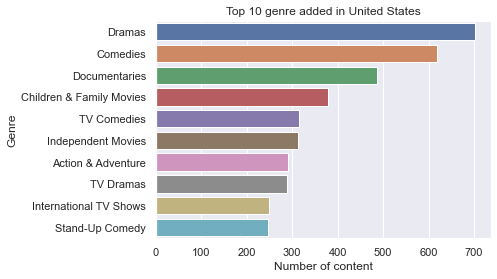

In [39]:
US_content = sns.barplot(y=US_genre[:10].index, x='count',data=US_genre[:10], orient='h')
US_content.set_title('Top 10 genre added in United States')
US_content.set_xlabel('Number of content')
US_content.set_ylabel('Genre')
plt.savefig('Top 10 genre added in United States', bbox_inches = 'tight')

##### 6. How is the rating distribution?

In [40]:
df_rating = pd.DataFrame(df.groupby('type')['rating'].value_counts().reset_index(name='counts'))
df_rating

,type,rating,counts
0,Movie,TV-MA,2067
1,Movie,TV-14,1427
2,Movie,R,797
3,Movie,TV-PG,540
4,Movie,PG-13,490
5,Movie,PG,287
6,Movie,TV-Y7,139
7,Movie,TV-Y,131
8,Movie,TV-G,126
9,Movie,NR,75


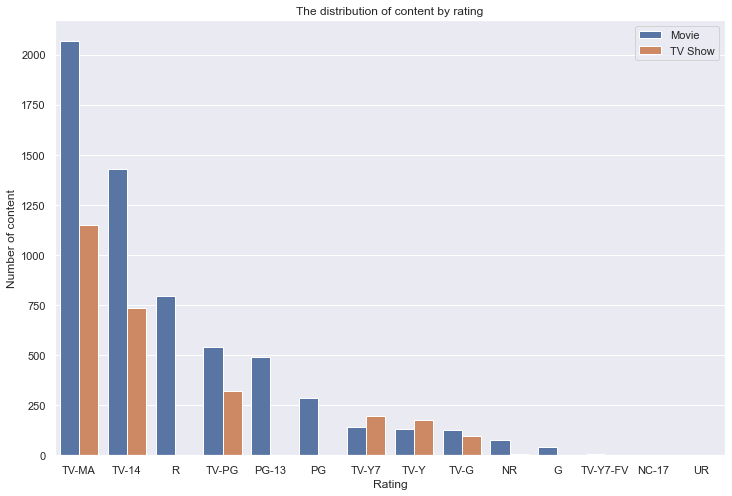

In [41]:
sns.set_theme()
plt.figure(figsize=(12,8))
rating_plot = sns.barplot(x = 'rating', y = 'counts', data = df_rating, hue='type')
plt.legend(loc='upper right')
rating_plot.set_title('The distribution of content by rating')
rating_plot.set_xlabel('Rating')
rating_plot.set_ylabel('Number of content')
plt.savefig('The distribution of content by rating', bbox_inches = 'tight')

In [42]:
#It looks like there are some ratings that only certified for one of the content type

## check if there exist unique rating type in tv show 
set(df[df['type']=='TV Show'].rating.unique())-set(df[df['type']=='Movie'].rating.unique())

#check if there exist unique movie rating type
movie_only = set(df[df['type']=='Movie'].rating.unique())-set(df[df['type']=='TV Show'].rating.unique())
print('this ratings are only certified for movie: ' + str(movie_only))

this ratings are only certified for movie: {'NC-17', 'G', 'PG', 'UR', 'PG-13'}


We can say that:
- there is no difference between the 1st and 2nd content rating with respect to type
- G, PG-13, UR, PG, and NC-17 are only certified for movie
- there is a huge difference in R rating for both type of content
- not much content added with TV-Y7-FV rating

##### 7. How many titles do have more than one director?

In [43]:
df['director'] = df['director'].astype('str')
df['num_directors']=df['director'].apply(lambda x:len(x.split(",")))

In [44]:
multi_director=df[df['num_directors']>1]
multi_director.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,num_listing,listed_in_US,num_directors
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021,1,Children & Family Movies,2
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Unknown,United States,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,22,9,2021,2,"Documentaries, International Movies",2
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",United States,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,21,9,2021,1,Children & Family Movies,2


In [45]:
#Let's see the number of directors collaborated
multi_director['num_directors'].value_counts().sort_index()

2     542
3      37
4      15
5       7
7       2
8       1
9       2
10      3
11      2
12      2
13      1
Name: num_directors, dtype: int64

We can say that most of content was directed by two directors. The maximum director collaborated is 13. 

In [46]:
#Let's see the title of content which was directed by more than 5 directors
multi_director.loc[multi_director['num_directors']>5,['title','country','director','num_directors']].sort_values(by='num_directors',ascending=False)

,title,country,director,num_directors
5887,Walt Disney Animation Studios Short Films Coll...,United States,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...",13
6910,HALO Legends,"United States, Japan","Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...",12
7515,Movie 43,United States,"Peter Farrelly, Will Graham, Steve Carr, Griff...",12
3124,"Sincerely Yours, Dhaka",Bangladesh,"Nuhash Humayun, Syed Ahmed Shawki, Rahat Rahma...",11
5837,X: Past Is Present,India,"Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, ...",11
3485,Sturgill Simpson Presents Sound & Fury,United States,"Jumpei Mizusaki, Koji Morimoto, Michael Arias,...",10
6624,Don Quixote: The Ingenious Gentleman of La Mancha,United States,"Mahin Ibrahim, Austin Kolodney, Will Lowell, D...",10
7164,Kahlil Gibran's The Prophet,"United States, France, Canada, Lebanon, Qatar","Roger Allers, Gaëtan Brizzi, Paul Brizzi, Joan...",10
297,Navarasa,India,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...",9
6984,Holidays,"United States, Ireland","Anthony Scott Burns, Nicholas McCarthy, Adam E...",9


We can assume that the directors origin is differs since the value of country itself shows multiple as well.

##### 8. Who is the most directed?

In [73]:
df['director']=df['director'].astype('str')
list_director=df['director'].apply(lambda x:len(x.split(",")))

most_director=set()
count_listings=Counter()

for listings in df['director']:
    listings=listings.split(",")
    most_director.update([lst.strip() for lst in listings])
    for lst in listings:
        count_listings[lst.strip()]+=1

most_director2=pd.DataFrame.from_dict(count_listings,orient='index')
most_director2.sort_values(0,ascending=False,inplace=True)
most_director2.rename(columns={0:'count'},inplace=True)
most_director_without_unknown = most_director2.drop('Unknown') 
most_director_without_unknown[:10]

,count
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Jay Chapman,12
Youssef Chahine,12


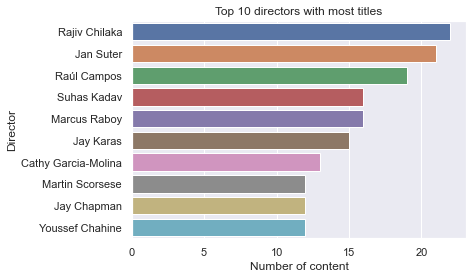

In [76]:
top_director = sns.barplot(y = most_director_without_unknown[:10].index, x = 'count', data = most_director_without_unknown[:10], orient='h' )
top_director.set_title('Top 10 directors with most titles')
top_director.set_xlabel('Number of content')
top_director.set_ylabel('Director')
plt.savefig('Top 10 directors with most titles', bbox_inches = 'tight')

As we know from the diagram, Rajiv Chilaka and Jan Suter are the top 2 directors with most titles.